<a href="https://colab.research.google.com/github/fahadrafiq94/Machine-Learning/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow_datasets as tfds

## Get the Dataset 

In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [ ]:
dataset, ds_info = tfds.load('cats_vs_dogs' ,
               split='train',
               shuffle_files=False,
               as_supervised=True,
               with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteSHRLI2/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


## Become One with data

In [ ]:
dataset

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
ds_info.features 

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})

In [ ]:
class_names = ds_info.features["label"].names 
class_names 

['cat', 'dog']

In [ ]:
one_sample  = dataset.take(1)

In [ ]:
one_sample 

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
for image, label in one_sample:
 print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
        """)


  Image shape: (262, 350, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 1
  Class name (str form): dog
        


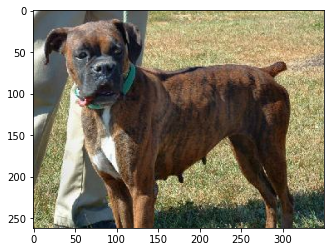

In [ ]:
plt.imshow(image)

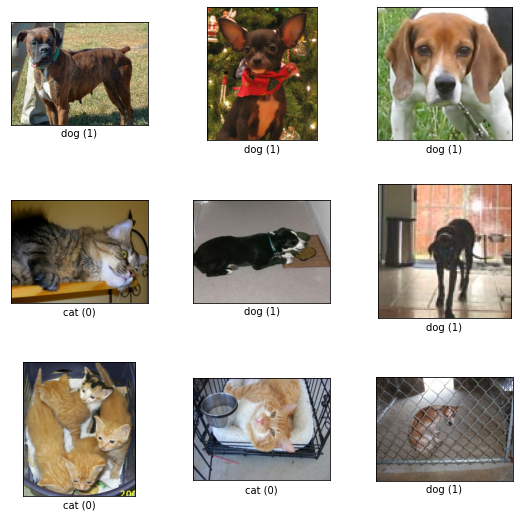

In [ ]:
fig = tfds.show_examples(dataset , ds_info , rows=3 ,cols=3)

## Preprocessing

In [ ]:
dataset = dataset.shuffle(10000 , seed=42)

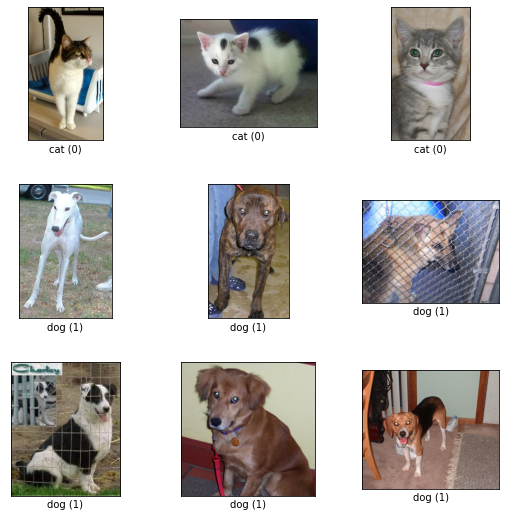

In [ ]:
fig = tfds.show_examples(dataset , ds_info , rows = 3, cols=3)

In [ ]:
train_size = int(len(dataset)*.80)
train_size

18609

In [ ]:
len(dataset)

23262

In [ ]:
train_data = dataset.take(train_size)
test_data =dataset.skip(train_size) 
len(train_data) ,len(test_data) 

(18609, 4653)

In [ ]:
train_data

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
test_data

<SkipDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
def preprocessing(image , label , img_shape=224):
  image =tf.image.resize(image , [img_shape ,img_shape])
  return tf.cast(image ,tf.float32)/255.0 ,label

In [ ]:
preprocessing(image , label)[0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.9457639 , 0.9692933 , 0.9692933 ],
        [0.92458034, 0.94149214, 0.9381833 ],
        [0.9015324 , 0.9140324 , 0.90692455],
        ...,
        [0.7828546 , 0.72357863, 0.54390925],
        [0.7119463 , 0.6588312 , 0.47362405],
        [0.6196609 , 0.57308024, 0.38460588]],

       [[0.93343836, 0.95497197, 0.9539741 ],
        [0.9213378 , 0.9379377 , 0.934473  ],
        [0.85643274, 0.8689327 , 0.8618249 ],
        ...,
        [0.7727624 , 0.7188583 , 0.5389159 ],
        [0.73887867, 0.69128966, 0.5054244 ],
        [0.70958394, 0.67015815, 0.4788236 ]],

       [[0.9291114 , 0.9447977 , 0.9408761 ],
        [0.8986678 , 0.9143541 , 0.9104325 ],
        [0.78132766, 0.7948152 , 0.78474486],
        ...,
        [0.7423018 , 0.6946478 , 0.516514  ],
        [0.7702698 , 0.724454  , 0.54412913],
        [0.7581304 , 0.7278783 , 0.534526  ]],

       ...,

       [[0.6378669 , 0.6087003 , 0.4232836 ],
        [0.67

In [ ]:
train_data = train_data.map(map_func=preprocessing , num_parallel_calls= tf.data.AUTOTUNE)
train_data = train_data.batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
test_data = test_data.map(map_func=preprocessing , num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size=32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_data ,test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

## Model

In [ ]:
from tensorflow.keras.layers import Dense , Conv2D , Flatten , MaxPool2D

## BaseModel model_0



In [ ]:
# set random seed 
tf.random.set_seed(42)

#creat base model
model_0 = tf.keras.Sequential([
        Flatten(input_shape=[224,224,3]),                     
        Dense(100, activation="relu"),
        Dense(100, activation = "relu"),
        Dense(1 , activation="sigmoid")
])

# Compile the model
model_0.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model 
history_0 = model_0.fit(train_data , 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps = len(test_data))

Epoch 1/5
582/582 [==============================] - 88s 122ms/step - loss: 1.3782 - accuracy: 0.5256 - val_loss: 0.7327 - val_accuracy: 0.5541
Epoch 2/5
582/582 [==============================] - 65s 93ms/step - loss: 0.7121 - accuracy: 0.5583 - val_loss: 0.7168 - val_accuracy: 0.5375
Epoch 3/5
582/582 [==============================] - 63s 94ms/step - loss: 0.7320 - accuracy: 0.5578 - val_loss: 0.6626 - val_accuracy: 0.5981
Epoch 4/5
582/582 [==============================] - 61s 91ms/step - loss: 0.7025 - accuracy: 0.5341 - val_loss: 0.6935 - val_accuracy: 0.4956
Epoch 5/5
582/582 [==============================] - 60s 89ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4889


In [ ]:
model_0.evaluate(test_data)

146/146 [==============================] - 23s 29ms/step - loss: 0.6931 - accuracy: 0.5033


[0.6931092143058777, 0.503331184387207]

In [ ]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


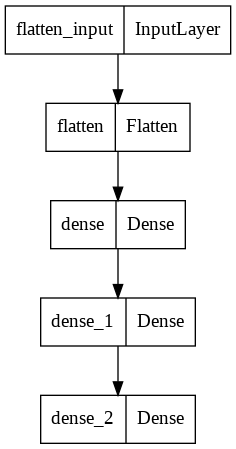

In [ ]:
from tensorflow.keras.utils import plot_model 
plot_model(model_0)

In [ ]:
pred = model_0.predict(test_data)

In [ ]:
pred

array([[0.49851847],
       [0.49851847],
       [0.49851847],
       ...,
       [0.49851847],
       [0.49851847],
       [0.49851847]], dtype=float32)

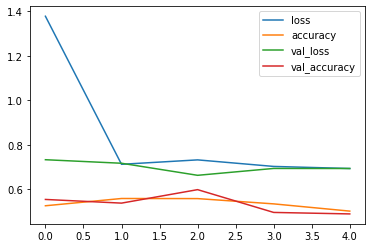

In [ ]:
pd.DataFrame(history_0.history).plot()

### Tiny VGG model

In [ ]:
#set random seed
tf.random.set_seed(42)

# create the model 
model_1 = tf.keras.Sequential([
      Conv2D(filters=10,
             kernel_size= 3,
             activation="relu",
             input_shape=(224,224,3)
             ),
      Conv2D(10,3,activation="relu"),
      MaxPool2D(pool_size=2 ,padding="valid"),

      Conv2D(10,3,activation ="relu"),
      Conv2D(10,3,activation="relu"),
      MaxPool2D(2),
      Flatten(),
      Dense(1 , activation="sigmoid")
])

# Compile the model 
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model 
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
582/582 [==============================] - 65s 80ms/step - loss: 0.6225 - accuracy: 0.6328 - val_loss: 0.5328 - val_accuracy: 0.7361
Epoch 2/10
582/582 [==============================] - 50s 76ms/step - loss: 0.5301 - accuracy: 0.7340 - val_loss: 0.4756 - val_accuracy: 0.7705
Epoch 3/10
582/582 [==============================] - 50s 76ms/step - loss: 0.4746 - accuracy: 0.7730 - val_loss: 0.4387 - val_accuracy: 0.7827
Epoch 4/10
582/582 [==============================] - 51s 76ms/step - loss: 0.4220 - accuracy: 0.8062 - val_loss: 0.3708 - val_accuracy: 0.8405
Epoch 5/10
582/582 [==============================] - 50s 76ms/step - loss: 0.3719 - accuracy: 0.8349 - val_loss: 0.3101 - val_accuracy: 0.8685
Epoch 6/10
582/582 [==============================] - 51s 76ms/step - loss: 0.3202 - accuracy: 0.8639 - val_loss: 0.2861 - val_accuracy: 0.8790
Epoch 7/10
582/582 [==============================] - 51s 76ms/step - loss: 0.2763 - accuracy: 0.8842 - val_loss: 0.2226 - val_accuracy:

In [ ]:
model_1.evaluate(test_data)

146/146 [==============================] - 18s 21ms/step - loss: 0.1367 - accuracy: 0.9538


[0.13672752678394318, 0.9537932276725769]

In [ ]:
pred_1 = model_1.predict(test_data)
pred_1

array([[9.3696845e-01],
       [6.9586993e-03],
       [1.3134782e-01],
       ...,
       [9.7981048e-01],
       [9.9681073e-01],
       [3.0170081e-04]], dtype=float32)

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
from tensorflow.keras.utils import plot_model 

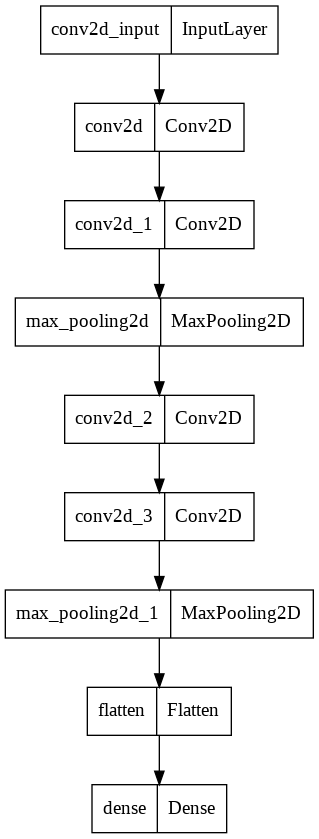

In [ ]:
plot_model(model_1)

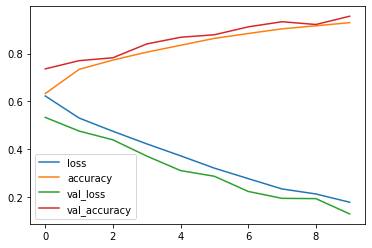

In [ ]:
pd.DataFrame(history_1.history).plot()

## Saved and Reload Model 

In [ ]:
model_1.save("/content/drive/MyDrive/cats_vs_dogs_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/cats_vs_dogs_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/cats_vs_dogs_model/assets


In [ ]:
loaded_model_1 = tf.keras.models.load_model("/content/drive/MyDrive/cats_vs_dogs_model")

In [ ]:
loaded_model_1.evaluate(test_data)

146/146 [==============================] - 18s 21ms/step - loss: 0.1302 - accuracy: 0.9523


[0.13022547960281372, 0.9522888660430908]

In [ ]:
model_1.evaluate(test_data)

146/146 [==============================] - 18s 22ms/step - loss: 0.1334 - accuracy: 0.9538


[0.1334192007780075, 0.9537932276725769]

## Test on custom Data 

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
import matplotlib.image as mpimg

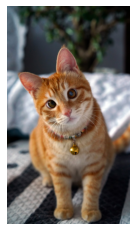

In [ ]:
cat = mpimg.imread("/content/cat.jpeg")
plt.imshow(cat)
plt.axis(False);

In [ ]:
cat.shape

(1778, 1000, 3)

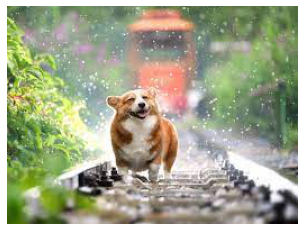

In [ ]:
dog = mpimg.imread("/content/dog.jpeg")
plt.imshow(dog)
plt.axis(False);

In [ ]:
dog.shape , dog.dtype

((194, 259, 3), dtype('uint8'))

In [ ]:
dog_pre = load_and_prep_image("dog.jpeg")

In [ ]:
# Make a function to predict on images and plot them (works with multi-class)
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

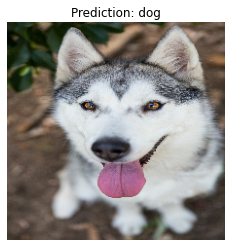

In [ ]:
pred_and_plot(loaded_model_1 , "dog_1.jpeg", class_names)

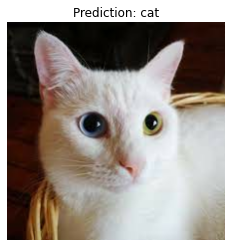

In [ ]:
pred_and_plot(loaded_model_1 , "cat_1.jpeg" , class_names)